# Модель жизненных сценариев

Срок жизни животного 1000 шагов (что соответствует 70 лет человека)

Создадим животное с возрастом, соответсвующим человеческим 30 годам

In [143]:
import math

age = 30

age_coef_const = 70 / 1000
print("Один шаг модели равняется ", age_coef_const, " годам")

current_step = math.trunc(age / age_coef_const)

def getAge(step):
    return 70 / 1000 * step
    
print(round(getAge(current_step)))

Один шаг модели равняется  0.07  годам
30


Определим максимальную возможную энергию животного для текущего шага жизни животного

Зададим константу $E_0$ равной 100

In [137]:
import numpy as np

E_max = np.zeros(1000)

def lambda_f(x):
    x= x/7
    return ((x**2) + (2*x))/((x**2) + 3)

E_0 = 100

E_max[:] = lambda_f(getAge(np.arange(1000))) * E_0
E_max[current_step]

126.08075652957069

Просто выведем график максимальной энергии

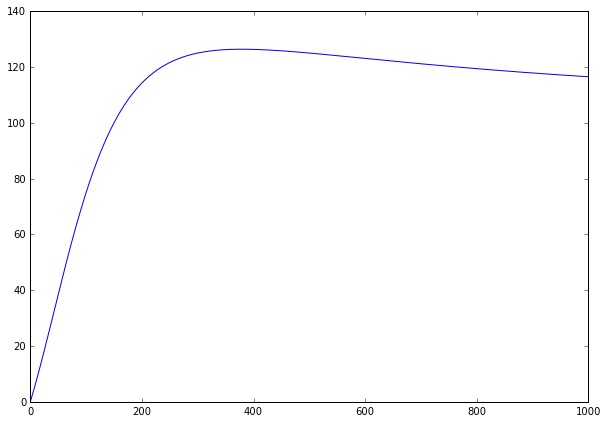

In [139]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, 1000)
plt.figure(figsize=(10, 7))
plt.plot(t, E_max, 'b')
plt.show()

Наделим животное максимальной энергией для текущего шага жизни

In [135]:
import numpy as np

E = np.zeros(1000)
E[current_step -1] = E_max[current_step - 1]


2.99438358037 0.580712978289 -1.8329576238


Запускаем случай голодания, когда животное не тратит время на передвижение, и не получает пищи

In [140]:
def epsilon_f(x):
    x = x/ 6
    return (x**3)/((4.5*x**3) - (14*x**2) + 18*x - 0.1) + 2

for i in range(current_step, current_step + 60):
    E[i] = E[i-1] - epsilon_f(getAge(current_step))
    
print(E[current_step + 50], E[current_step + 51], E[current_step + 52])

2.99438358037 0.580712978289 -1.8329576238


На шаге 52 голодания енергия животного переходит через ноль

# График убывания энергии при голодании

Животное не двигается, не ест, теряет энергию каждый шаг модели

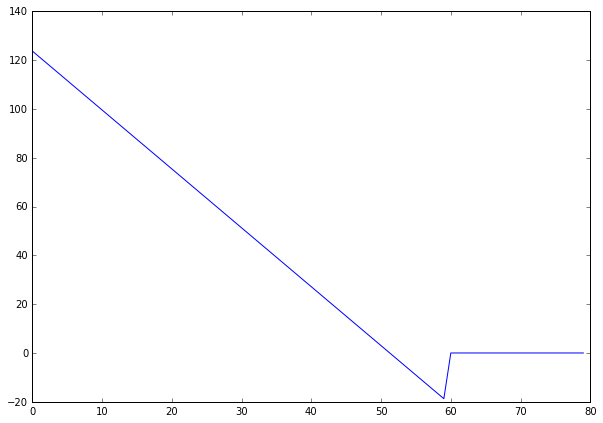

In [142]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, 80)
plt.figure(figsize=(10, 7))
plt.plot(t, E[428:508], 'b')
plt.show()